# ***`11. In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.`***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# ***`a. Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() function. Note you may find it helpful to use the data.frame() function to create a single data set containing both mpg01 and the other Auto variables.`***

In [ ]:
Auto_Data = pd.read_csv("Auto.csv", na_values="?")
Auto_Data = Auto_Data.dropna()
Auto_Data

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [ ]:
mpg_median_value = Auto_Data.mpg.median()
print("The median of mpg is: ",mpg_median_value)
Auto_Data["mpg01"] = np.where(Auto_Data.mpg>mpg_median_value, 1, 0)
Auto_Data

The median of mpg is:  22.75


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,1
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,1
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,1
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,1


# ***`b. Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.`***

In [ ]:
Auto_Data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,0.836939
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.759194
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.753477
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.667053
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.757757
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.346822
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.429904
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.513698
mpg01,0.836939,-0.759194,-0.753477,-0.667053,-0.757757,0.346822,0.429904,0.513698,1.000000


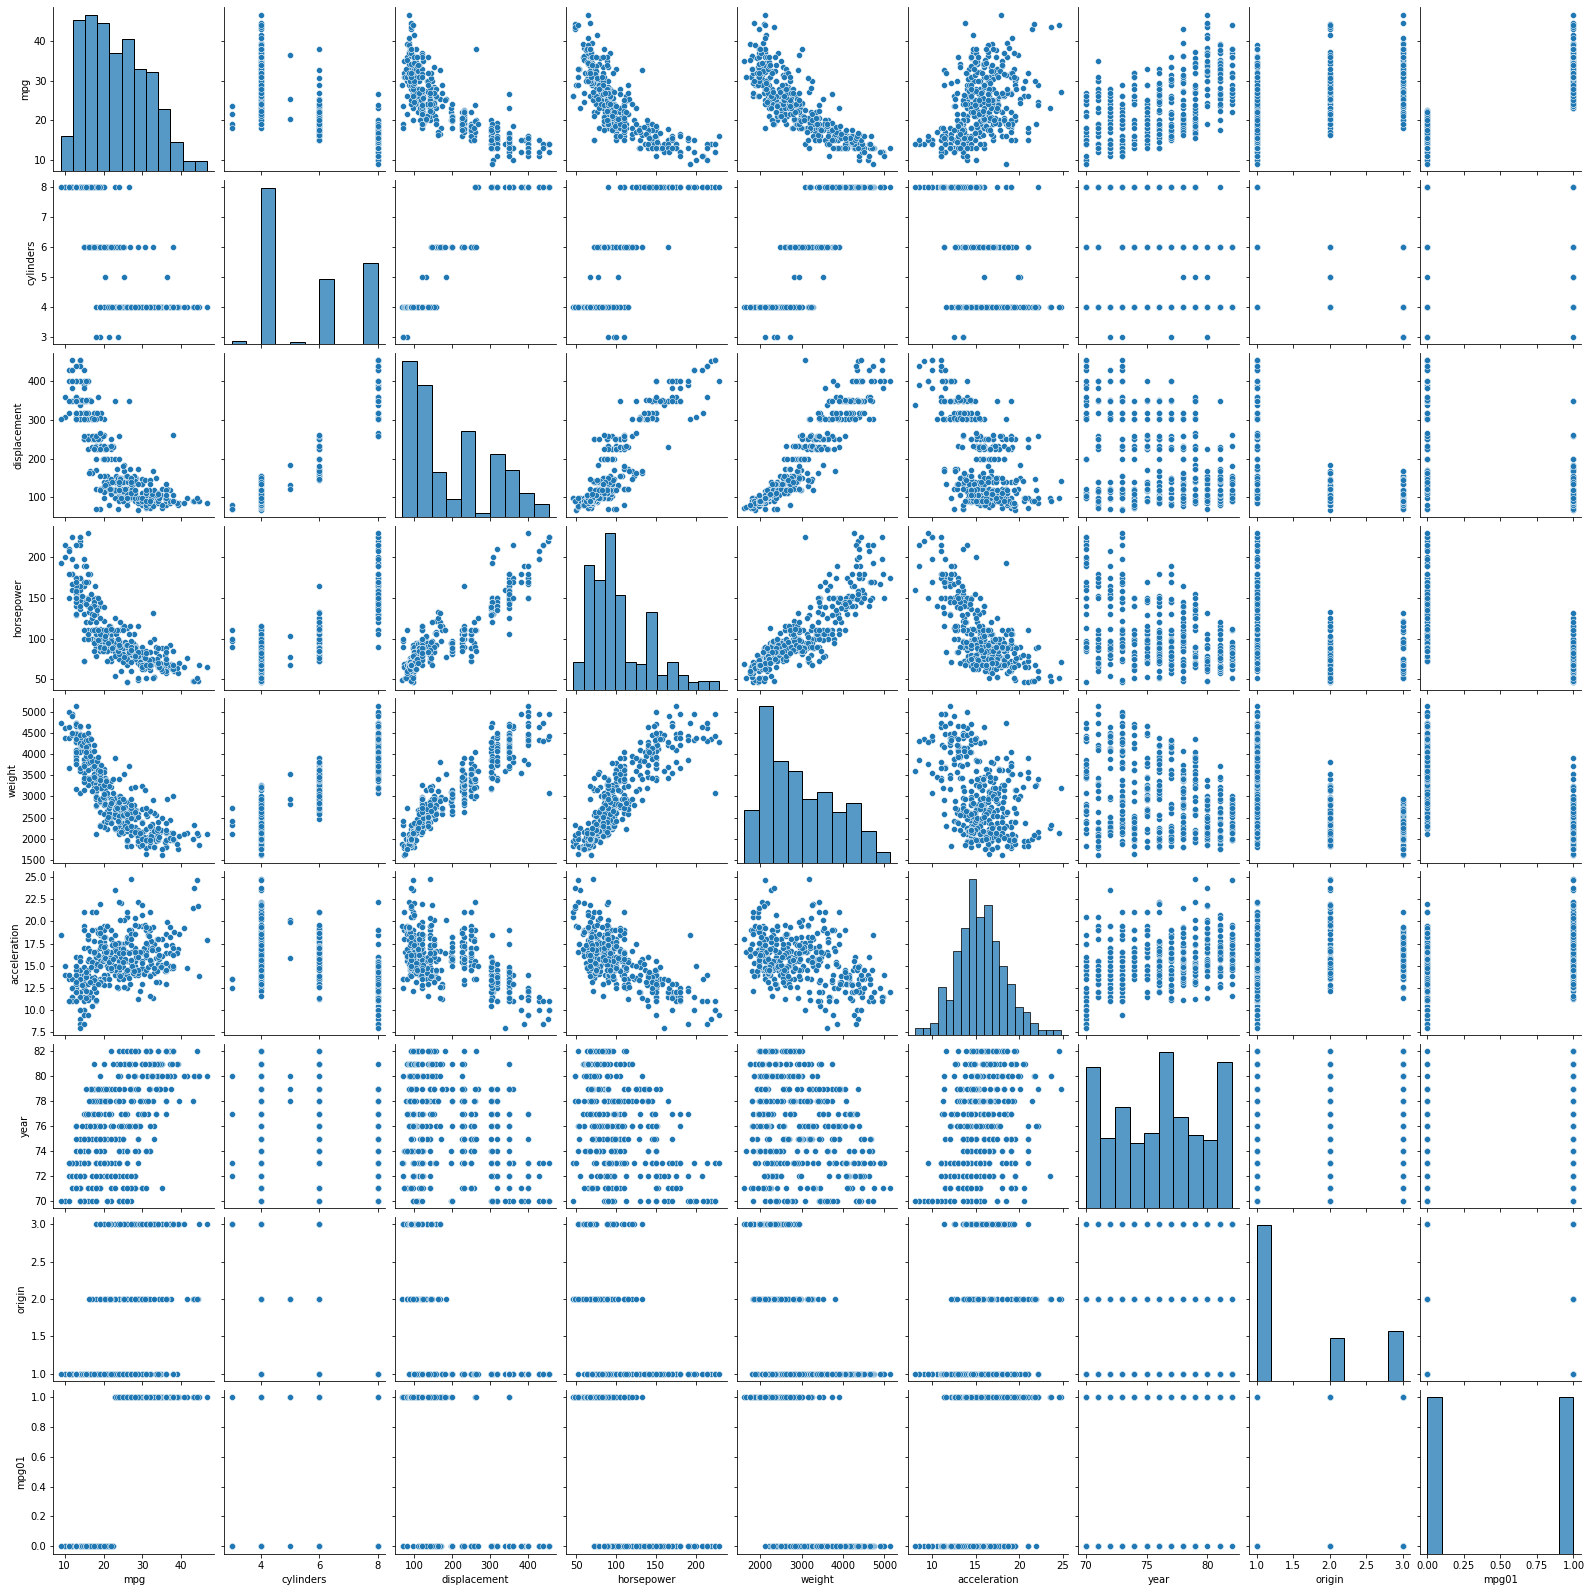

In [ ]:
sns.pairplot(Auto_Data)

In [ ]:
# According to the above pairplots, horsepower, weight and acceleration seem most likely to be useful in predicting mpg01

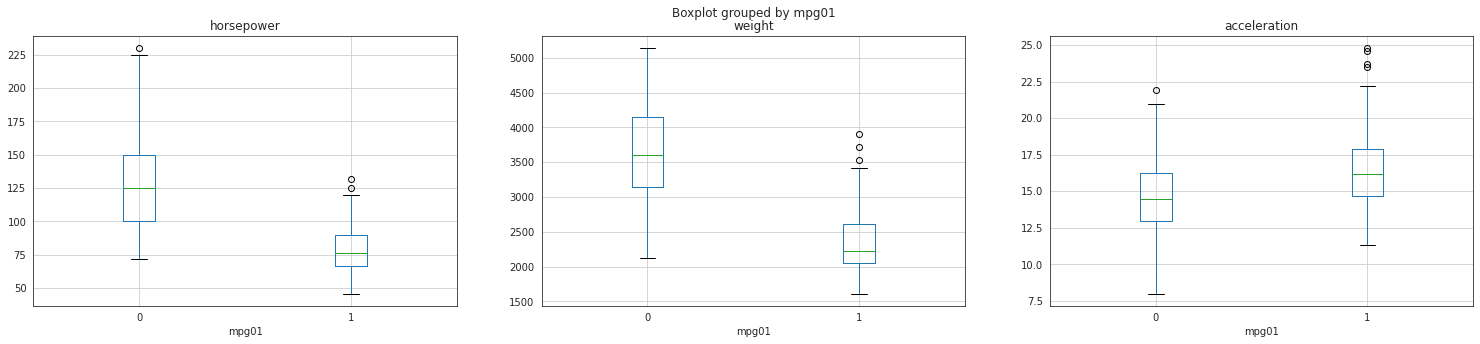

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,5))
Auto_Data.boxplot(["horsepower"], by="mpg01", ax=ax1)
Auto_Data.boxplot(["weight"], by="mpg01", ax=ax2)
Auto_Data.boxplot(["acceleration"], by="mpg01", ax=ax3)

# ***`c. Split the data into a training set and a test set.`***

In [ ]:
predictors = ["horsepower", "weight", "acceleration"]
response = "mpg01"
X_data = Auto_Data[predictors]
y_data = Auto_Data[response]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,test_size = 0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(274, 3)
(118, 3)
(274,)
(118,)


# ***`d. Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?`***

In [ ]:
LDA = LinearDiscriminantAnalysis()
Model = LDA.fit(X_train, y_train)

y_predict = Model.predict(X_test)
y_predict =np.where(y_predict>0.5, 1, 0)
y_truth = y_test
print("The test error of the model: ")
print((1- accuracy_score(y_truth, y_predict))*100, "%")


The test error of the model: 
18.644067796610166 %


# ***`e. Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?`***

In [ ]:
QDA = QuadraticDiscriminantAnalysis()
Model = QDA.fit(X_train, y_train)

y_predict = Model.predict(X_test)
y_predict =np.where(y_predict>0.5, 1, 0)
y_truth = y_test
print("The test error of the model: ")
print((1- accuracy_score(y_truth, y_predict))*100, "%")

The test error of the model: 
17.796610169491522 %


# ***`f. Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?`***

In [ ]:
Model = sm.Logit(y_train, X_train)
Model = Model.fit()

y_predict = Model.predict(X_test)
y_predict =np.where(y_predict>0.5, 1, 0)
y_truth = y_test
print("The test error of the model: ")
print((1- accuracy_score(y_truth, y_predict))*100, "%")

Optimization terminated successfully.
         Current function value: 0.299356
         Iterations 8
The test error of the model: 
16.10169491525424 %


# ***`g. Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?`***

1 .The test error of the model with k= 1 is:  15.254237288135597 %
2 .The test error of the model with k= 2 is:  12.711864406779661 %
3 .The test error of the model with k= 3 is:  15.254237288135597 %
4 .The test error of the model with k= 4 is:  15.254237288135597 %
5 .The test error of the model with k= 5 is:  15.254237288135597 %
6 .The test error of the model with k= 6 is:  15.254237288135597 %
7 .The test error of the model with k= 7 is:  17.796610169491522 %
8 .The test error of the model with k= 8 is:  14.406779661016945 %
9 .The test error of the model with k= 9 is:  15.254237288135597 %
10 .The test error of the model with k= 10 is:  13.559322033898303 %
11 .The test error of the model with k= 11 is:  16.94915254237288 %
12 .The test error of the model with k= 12 is:  15.254237288135597 %
13 .The test error of the model with k= 13 is:  16.94915254237288 %
14 .The test error of the model with k= 14 is:  16.10169491525424 %
15 .The test error of the model with k= 15 is:  16.9491

Text(0, 0.5, 'Test error(%)')

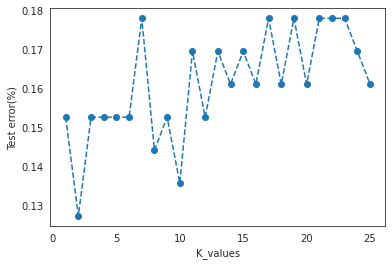

In [ ]:
error_list = np.array([])
no_of_K = 25
for i in range(no_of_K):
  KNN = KNeighborsClassifier(n_neighbors=i+1)
  Model = KNN.fit(X_train, y_train)
  y_predict = Model.predict(X_test)
  y_predict =np.where(y_predict>0.5, 1, 0)
  y_truth = y_test
  error = (1- accuracy_score(y_truth, y_predict))
  error_list = np.append(error_list, error)
  print(i+1, ".The test error of the model with k=", i+1, "is: ", error*100, "%")
K_values = [i for i in range(1, no_of_K+1, 1)]
plt.plot(K_values, error_list, linestyle='--', marker='o')
plt.xlabel("K_values")
plt.ylabel("Test error(%)")

In [ ]:
# According to the above figure, with K = 2 the model seems to perform the best on this data